# Problem Statement

Customer churn, or the loss of clients, is a critical concern for banks, as retaining customers is often more cost-effective than acquiring new ones. The objective of this analysis is to develop a predictive model to identify bank customers likely to leave based on their profile and behavioral data. By proactively identifying these customers, banks can implement targeted retention strategies to reduce churn and improve customer satisfaction.

In [9]:
!pip install pandas

In [10]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# Upload the dataset file and check the first five rows of the data to understand the dataset
data = pd.read_csv("/content/Bank_Customer_Churn_Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Check for the dataset information, if there are any NULL values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [13]:
# Check the shape of the creditcard dataset
data.shape

(10000, 12)

In [14]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [15]:
# Check if there are any duplicated values, if yes, remove them
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [16]:
# Check the summary of the statistical properties of the numerical columns in the dataset
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
# Encode categorical variables : We have two categorical features: country and gender.
data_encoded = pd.get_dummies(data, columns=['country'], drop_first=True)

# Label encode 'gender' (Female = 0, Male = 1)
data_encoded['gender'] = data_encoded['gender'].map({'Female': 0, 'Male': 1})

# Display the encoded DataFrame
print("Encoded DataFrame:")  # Print a descriptive label
print(data_encoded)  # Print the DataFrame

Encoded DataFrame:
      customer_id  credit_score  gender  age  tenure    balance  \
0        15634602           619       0   42       2       0.00   
1        15647311           608       0   41       1   83807.86   
2        15619304           502       0   42       8  159660.80   
3        15701354           699       0   39       1       0.00   
4        15737888           850       0   43       2  125510.82   
...           ...           ...     ...  ...     ...        ...   
9995     15606229           771       1   39       5       0.00   
9996     15569892           516       1   35      10   57369.61   
9997     15584532           709       0   36       7       0.00   
9998     15682355           772       1   42       3   75075.31   
9999     15628319           792       0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1         101348.88      1   
1                   

In [20]:
# Use the display function from IPython.display
from IPython.display import display

display(data_encoded)

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [21]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card',
                  'active_member', 'estimated_salary']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the selected numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Use the display function from IPython.display
from IPython.display import display

display(data_encoded)

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,False,False
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,False,True
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,False,False
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,False,False
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1.246488,1,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0,False,False
9996,15569892,-1.391939,1,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0,False,False
9997,15584532,0.604988,0,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1,False,False
9998,15682355,1.256835,1,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1,True,False


In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop(columns=['customer_id', 'churn'])  # Drop 'customer_id' and target 'churn'
y = data_encoded['churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((8000, 11), (2000, 11), (8000,), (2000,))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the LR model
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 81.15%


In [27]:
# Get classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [28]:
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1544   63]
 [ 314   79]]


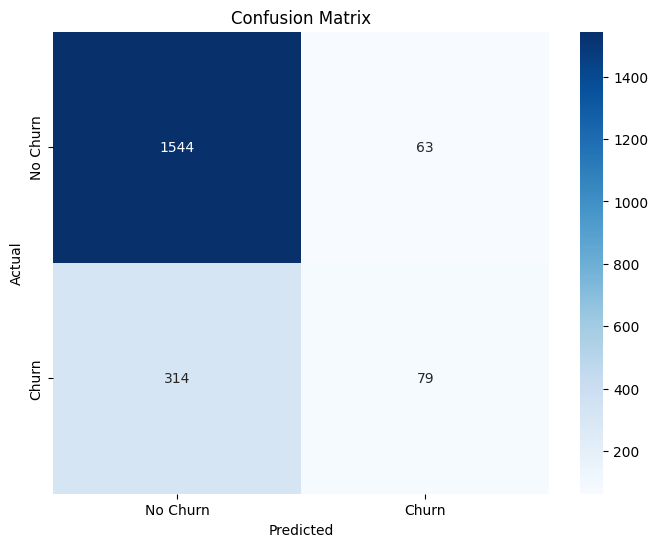

In [31]:
from sklearn.metrics import roc_curve, auc

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix: To see the true positives, false positives, false negatives and false positives.

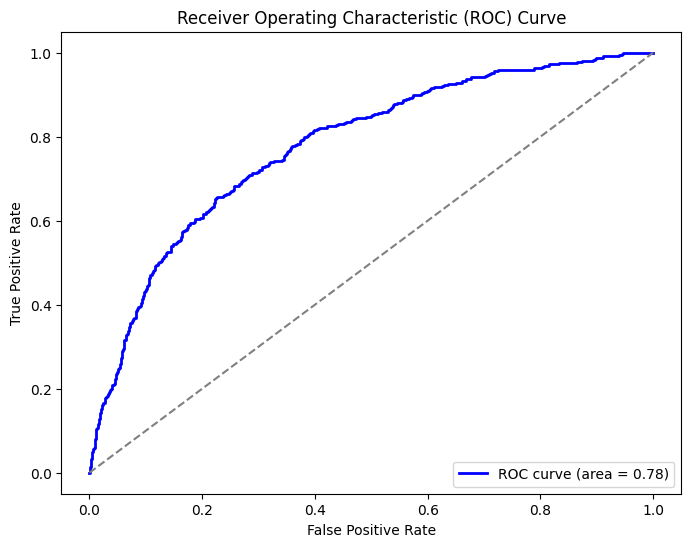

In [32]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

ROC Curve: To evaluate the model's ability to distinguish between the classes. The Receiver Operating Characteristic curve illustrates the model's performance at various threshold levels. The area under the curve (AUC) value indicates how well the model distinguishes between the two classes, with a value closer to 1 being ideal.